#General Imports

In [1]:
import os, inspect, sys
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8

In [3]:
script_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.append(os.path.join(script_dir, os.pardir, os.pardir))

In [4]:
from opengrid.library import config
c = config.Config()

In [5]:
sys.path.append(c.get('tmpo', 'folder'))

try:
    if os.path.exists(c.get('tmpo', 'data')):
        path_to_tmpo_data = c.get('tmpo', 'data')
except:
    path_to_tmpo_data = None

#Import Houseprint Modules

In [6]:
from opengrid.library.houseprint import houseprint

#Test

##Houseprint

In [7]:
hp = houseprint.Houseprint(gjson = c.get('houseprint','json'))

Opening connection to Houseprint sheet
Opening spreadsheets
Parsing spreadsheets
22 Sites created
22 Devices created
72 sensors created
Houseprint parsing complete


In [8]:
hp


    Houseprint
    Created on 2015-09-17 13:56:09.333154 (UTC)
    22 sites
    22 devices
    72 sensors
    

In [9]:
hp.sites

[
     Site
     Key: 1
     1 devices
     6 sensors
     , 
     Site
     Key: 2
     1 devices
     6 sensors
     , 
     Site
     Key: 3
     1 devices
     1 sensors
     , 
     Site
     Key: 4
     1 devices
     4 sensors
     , 
     Site
     Key: 5
     1 devices
     1 sensors
     , 
     Site
     Key: 6
     1 devices
     1 sensors
     , 
     Site
     Key: 7
     1 devices
     5 sensors
     , 
     Site
     Key: 8
     1 devices
     4 sensors
     , 
     Site
     Key: 9
     1 devices
     4 sensors
     , 
     Site
     Key: 10
     1 devices
     3 sensors
     , 
     Site
     Key: 11
     1 devices
     2 sensors
     , 
     Site
     Key: 12
     1 devices
     1 sensors
     , 
     Site
     Key: 13
     1 devices
     2 sensors
     , 
     Site
     Key: 14
     1 devices
     1 sensors
     , 
     Site
     Key: 15
     1 devices
     6 sensors
     , 
     Site
     Key: 16
     1 devices
     5 sensors
     , 
     Site
     Key: 17
     1 d

In [10]:
hp.get_devices()

[
     Fluksometer
     Key: FL03001552
     6 sensors
     , 
     Fluksometer
     Key: FL03001561
     6 sensors
     , 
     Fluksometer
     Key: FL02000449
     1 sensors
     , 
     Fluksometer
     Key: FL03001566
     4 sensors
     , 
     Fluksometer
     Key: FL03001578
     1 sensors
     , 
     Fluksometer
     Key: FL03001577
     1 sensors
     , 
     Fluksometer
     Key: FL03001573
     5 sensors
     , 
     Fluksometer
     Key: FL03001553
     4 sensors
     , 
     Fluksometer
     Key: FL03001556
     4 sensors
     , 
     Fluksometer
     Key: FL03001550
     3 sensors
     , 
     Fluksometer
     Key: FL02000628
     2 sensors
     , 
     Fluksometer
     Key: FL03001557
     1 sensors
     , 
     Fluksometer
     Key: FL03001560
     2 sensors
     , 
     Fluksometer
     Key: FL03001549
     1 sensors
     , 
     Fluksometer
     Key: FL03001570
     6 sensors
     , 
     Fluksometer
     Key: FL03001525
     5 sensors
     , 
     Fluksometer
     

In [11]:
hp.get_sensors('water')

[
     Fluksosensor
     Key: 661684d35cd07dfc657a60b844860785
     Type: water
     , 
     Fluksosensor
     Key: b28509eb97137e723995838c393d49df
     Type: water
     , 
     Fluksosensor
     Key: 36dac700f81c6be9ca233e6534182ed4
     Type: water
     , 
     Fluksosensor
     Key: 2923b75daf93e539e37ce5177c0008c5
     Type: water
     , 
     Fluksosensor
     Key: a8054ca7865584e69a7c946aeea1e13c
     Type: water
     , 
     Fluksosensor
     Key: 4e63e6b6b5bdb137658d84a861593e5c
     Type: water
     , 
     Fluksosensor
     Key: 1a5c55ec176d24483572aca420ac59b5
     Type: water
     , 
     Fluksosensor
     Key: c57f45b21e2ec21ab427f172478e1ca4
     Type: water
     , 
     Fluksosensor
     Key: a926bc966f178fc5d507a569a5bfc3d7
     Type: water
     , 
     Fluksosensor
     Key: a519ce042e8748570d3a91cfca16a747
     Type: water
     ]

A Houseprint object can be saved as a pickle. It loses its tmpo session however (connections cannot be pickled)

In [12]:
hp.save('new_houseprint.pkl')

Saved houseprint to /Users/Jan/git_jrtpec/opengrid/scripts/new_houseprint.pkl


In [13]:
hp = houseprint.load_houseprint_from_file('new_houseprint.pkl')

###TMPO

The houseprint, sites, devices and sensors all have a get_data method. In order to get these working for the fluksosensors, the houseprint needs a tmpo session

In [14]:
hp.init_tmpo(path_to_tmpo_data)

In [15]:
hp.sync_tmpos()

/Library/Python/2.7/site-packages/requests/packages/urllib3/connection.py:251: SecurityWarning: Certificate has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SecurityWarning
/Library/Python/2.7/site-packages/requests/packages/urllib3/connection.py:251: SecurityWarning: Certificate has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SecurityWarning
/Library/Python/2.7/site-packages/requests/packages/urllib3/connection.py:251: SecurityWarning: Certificate has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for detai

###Lookup sites, devices, sensors

In [16]:
hp.find_site(1)


    Site
    Key: 1
    1 devices
    6 sensors
    

In [17]:
hp.find_device('FL03001552')


    Fluksometer
    Key: FL03001552
    6 sensors
    

In [18]:
hp.find_sensor('53b1eb0479c83dee927fff10b0cb0fe6')


    Fluksosensor
    Key: 53b1eb0479c83dee927fff10b0cb0fe6
    Type: electricity
    

###Get Data

/Library/Python/2.7/site-packages/pandas/tseries/base.py:361: FutureWarning: using '+' to provide set union with datetimelike Indexes is deprecated, use .union()
  "use .union()",FutureWarning)


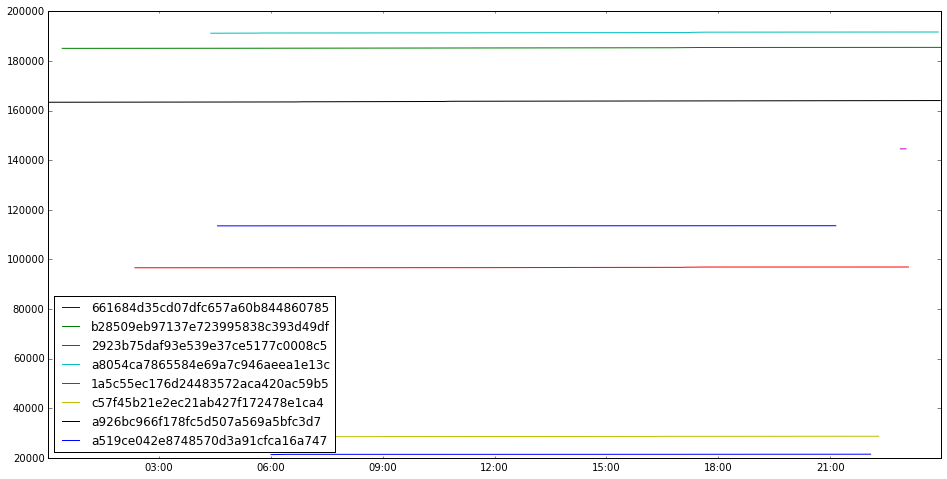

In [19]:
head = pd.Timestamp('20150617')
tail = pd.Timestamp('20150618')
hp.get_data(sensortype='water', head=head,tail=tail).plot()

##Site

In [20]:
site = hp.find_site(1)
site


    Site
    Key: 1
    1 devices
    6 sensors
    

In [21]:
print site.size
print site.inhabitants
print site.postcode
print site.construction_year
print site.k_level
print site.e_level
print site.epc_cert

160
5

1913


263


In [22]:
site.devices

[
     Fluksometer
     Key: FL03001552
     6 sensors
     ]

In [23]:
site.get_sensors('electricity')

[
     Fluksosensor
     Key: 53b1eb0479c83dee927fff10b0cb0fe6
     Type: electricity
     , 
     Fluksosensor
     Key: 7fae5d2f0354bd3f3681881918a253c8
     Type: electricity
     , 
     Fluksosensor
     Key: e8fa1a454e137aa36c1adfd9de94406b
     Type: electricity
     ]

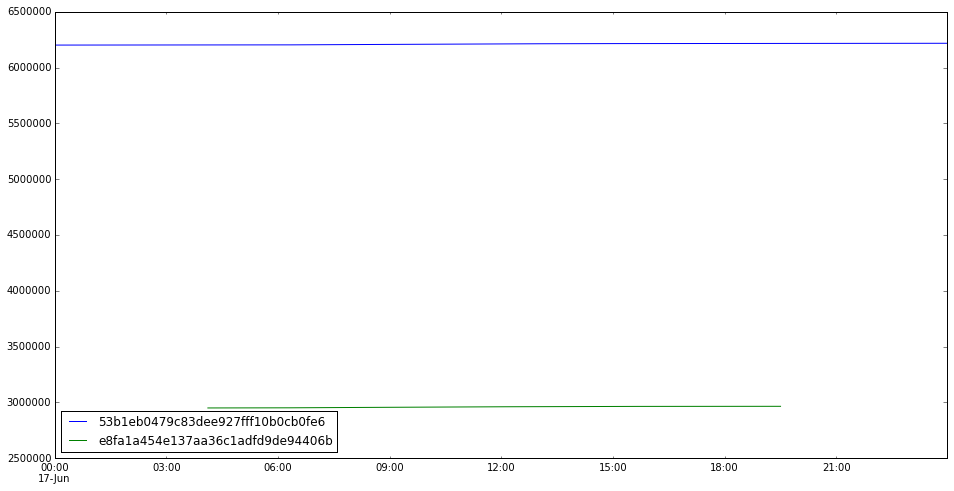

In [24]:
head = pd.Timestamp('20150617')
tail = pd.Timestamp('20150618')
site.get_data(sensortype='electricity', head=head,tail=tail).plot()

##Device

In [25]:
device = hp.find_device('FL03001552')
device


    Fluksometer
    Key: FL03001552
    6 sensors
    

In [26]:
device.key

'FL03001552'

In [27]:
device.get_sensors('gas')

[
     Fluksosensor
     Key: a6028457292f1866b468b63adcc82ee3
     Type: gas
     , 
     Fluksosensor
     Key: 29ba25498c657eda0cdd34bf22d3f9e4
     Type: gas
     ]

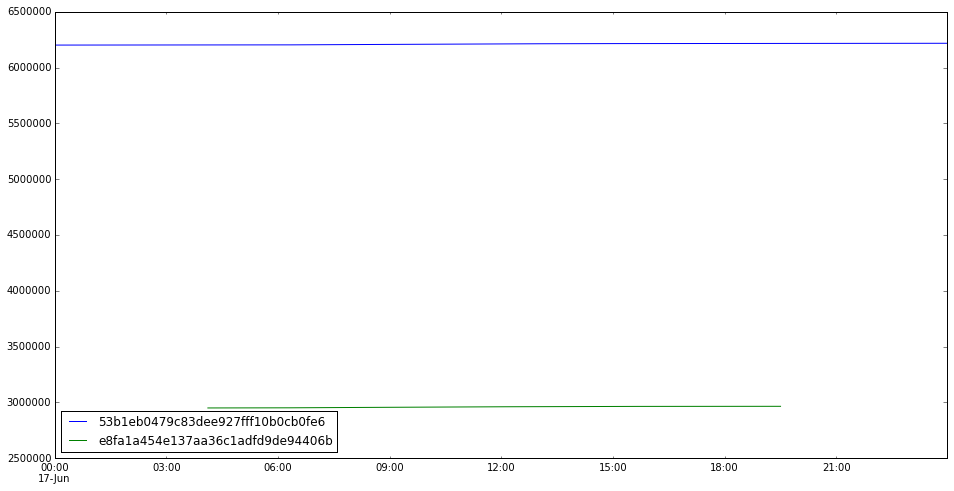

In [28]:
head = pd.Timestamp('20150617')
tail = pd.Timestamp('20150618')
device.get_data(sensortype='electricity', head=head,tail=tail).plot()

##Sensor

In [29]:
sensor = hp.find_sensor('53b1eb0479c83dee927fff10b0cb0fe6')
sensor


    Fluksosensor
    Key: 53b1eb0479c83dee927fff10b0cb0fe6
    Type: electricity
    

In [30]:
sensor.key

'53b1eb0479c83dee927fff10b0cb0fe6'

In [31]:
sensor.type

'electricity'

In [32]:
sensor.description

'Main'

In [33]:
sensor.system

'grid'

In [34]:
sensor.unit

'Wh'

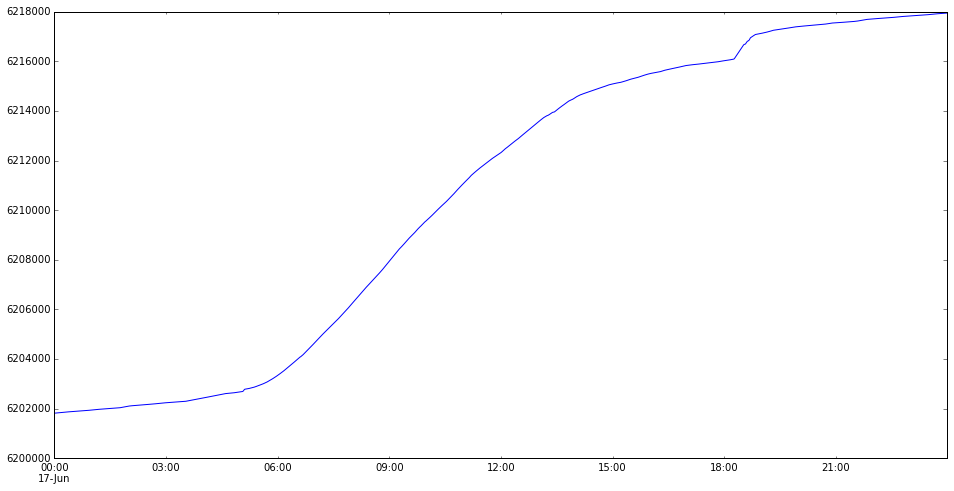

In [35]:
head = pd.Timestamp('20150617')
tail = pd.Timestamp('20150618')
sensor.get_data(head,tail).plot()